Churn for Bank Customers
https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
#import plotly.express as px
df = pd.read_csv("C:/Users/CHARLIE/Desktop/客戶流失預測/churn.csv", sep = ',')

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


1. RowNumber — corresponds to the record (row) number and has no effect on the output.
2. CustomerId — contains random values and has no effect on customer leaving the bank.
3. Surname — the surname of a customer has no impact on their decision to leave the bank.
4. CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
5. Geography — a customer’s location can affect their decision to leave the bank.
6. Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank.
7. Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
8. Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
9. Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
10. NumOfProducts — refers to the number of products that a customer has purchased through the bank.
11. HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
12. IsActiveMember — active customers are less likely to leave the bank.
13. EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
14. Exited — whether or not the customer left the bank.

In [2]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [2]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [3]:
df.describe(include = 'all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### EDA

#### 相關係數

<AxesSubplot: >

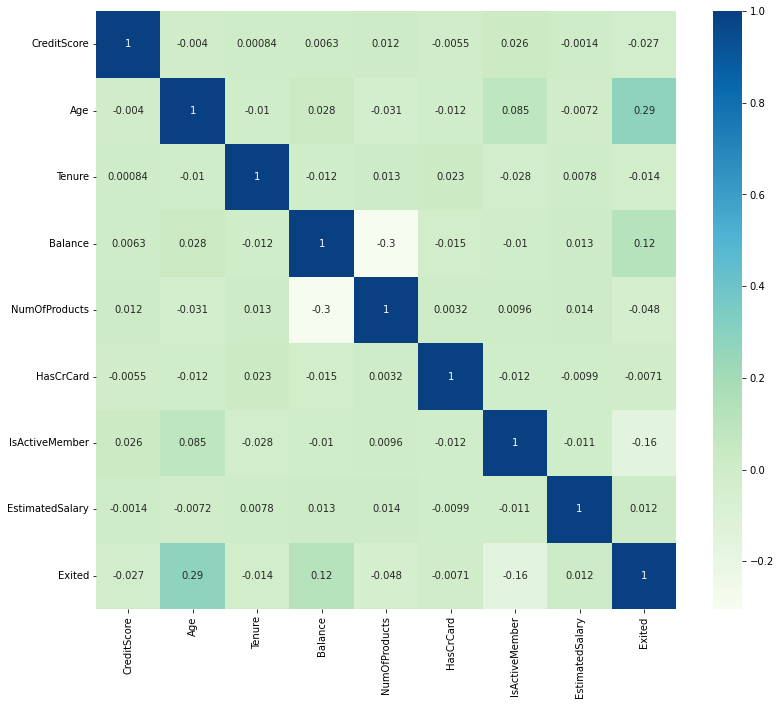

In [4]:
numeric_data = df.select_dtypes(include=['int', 'float'])
cm = numeric_data.corr()

plt.figure(figsize = (13, 11))
sns.heatmap(cm, annot = True, cmap = 'GnBu')

#### 年齡、信用評分、帳戶餘額、薪資

In [3]:
df_copy = df.copy()
df_copy['NumOfProducts'] = df_copy['NumOfProducts'].astype(str)
df_copy['HasCrCard'] = df_copy['HasCrCard'].astype(str)
df_copy['IsActiveMember'] = df_copy['IsActiveMember'].astype(str)
df_copy['Exited'] = df_copy['Exited'].astype(str)
# df_copy['Tenure'] = df_copy['Tenure'].astype(str)

In [7]:
df_copy.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

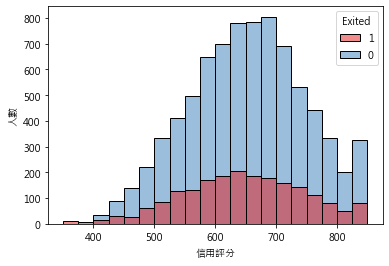

In [4]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 11})
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'

sns.histplot(data = df_copy, x='CreditScore', bins=20, hue='Exited', palette='Set1')

plt.xlabel('信用評分')
plt.ylabel('人數')
#plt.title('信用評分分佈')

plt.show()

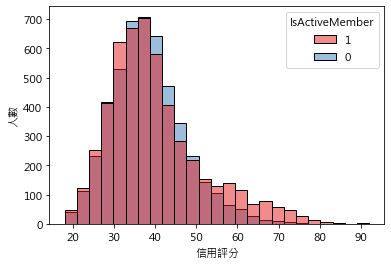

In [7]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 11})
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'

sns.histplot(data = df_copy, x='Age', bins=25, hue='IsActiveMember', palette='Set1')

plt.xlabel('信用評分')
plt.ylabel('人數')
#plt.title('信用評分分佈')

plt.show()

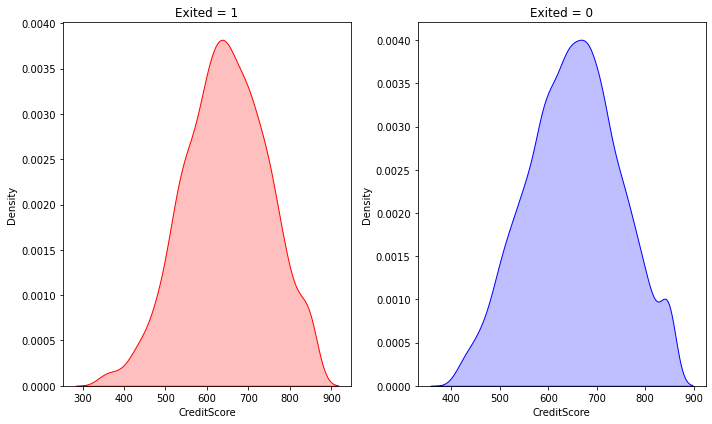

In [9]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data = df_copy[df_copy['Exited'] == '1'], x = 'CreditScore', color = 'red', fill = True)
plt.title('Exited = 1')
plt.xlabel('CreditScore')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data = df_copy[df_copy['Exited'] == '0'], x = 'CreditScore', color = 'blue', fill = True)
plt.title('Exited = 0')
plt.xlabel('CreditScore')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

c:\Users\CHARLIE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\CHARLIE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\CHARLIE\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\CHARLI

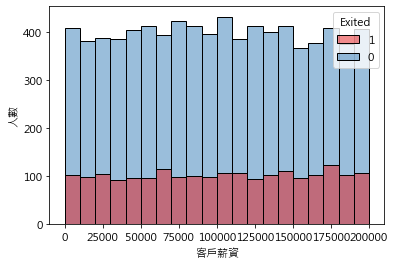

In [74]:
sns.histplot(data = df_copy, x = 'EstimatedSalary', bins = 20, hue = 'Exited', palette = 'Set1')

plt.xlabel('客戶薪資')
plt.ylabel('人數')
#plt.title('客戶薪資')

plt.show()

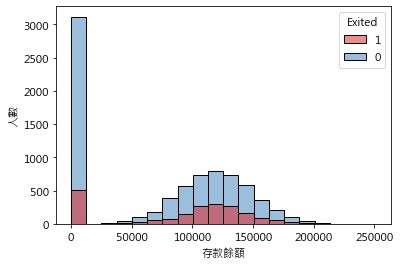

In [14]:
sns.histplot(data = df_copy, x = 'Balance', bins = 20, hue = 'Exited', palette = 'Set1')
#sns.kdeplot(data=df_copy, x='CreditScore', hue='Exited', palette='Set1', fill=True)

plt.xlabel('存款餘額')
plt.ylabel('人數')
#plt.title('客戶薪資')

plt.show()

#### 產品數-流失

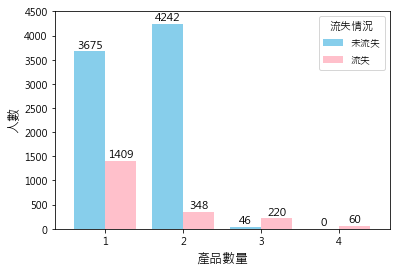

In [54]:
def add_bar_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')
counts = df_copy.groupby(['NumOfProducts', 'Exited']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['skyblue', 'pink']))
ax = counts.plot(kind = 'bar', stacked = False, width = 0.8)
add_bar_labels(ax)

plt.xlabel('產品數量', fontsize = 13)
plt.ylabel('人數', fontsize = 13)
plt.legend(['未流失', '流失'], title='流失情況', fontsize=10)
plt.ylim(0, 4500)
plt.xticks(fontsize=10, rotation = 0)
plt.yticks(fontsize=10)

plt.show()

In [65]:
import numpy as np
import scipy.stats
chi = np.array([counts.iloc[0, :].tolist(), 
                counts.iloc[1, :].tolist(),
                counts.iloc[2, :].tolist(),
                counts.iloc[3, :]])

scipy.stats.chi2_contingency(chi)

Chi2ContingencyResult(statistic=1503.6293615070408, pvalue=0.0, dof=3, expected_freq=array([[4048.3892, 1035.6108],
       [3655.017 ,  934.983 ],
       [ 211.8158,   54.1842],
       [  47.778 ,   12.222 ]]))

#### 地理位置-流失

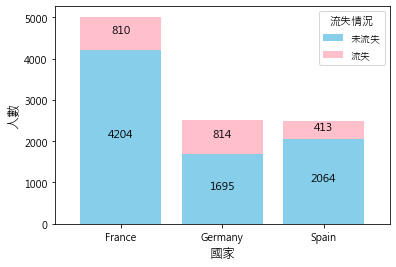

In [83]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 11})

counts = df_copy.groupby(['Geography', 'Exited']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['skyblue', 'pink']))
counts.plot(kind = 'bar', stacked = True, width = 0.8)

for i, category in enumerate(counts.index):
    total_count = counts.loc[category].sum()
    bottom = 0
    for j, col_label in enumerate(counts.columns):
        count = counts.loc[category, col_label]
        plt.text(i, bottom + count/2, str(count), ha='center', color='black')
        bottom += count

plt.xlabel('國家', fontsize = 13)
plt.ylabel('人數', fontsize = 13)
plt.legend(['未流失', '流失'], title='流失情況', fontsize=10)
plt.xticks(fontsize=10, rotation = 0)
plt.yticks(fontsize=10)

plt.show()

In [62]:
chi = np.array([counts.iloc[0, :].tolist(), 
                counts.iloc[1, :].tolist(),
                counts.iloc[2, :].tolist()])
scipy.stats.chi2_contingency(chi)

Chi2ContingencyResult(statistic=301.25533682434536, pvalue=3.8303176053541544e-66, dof=2, expected_freq=array([[3992.6482, 1021.3518],
       [1997.9167,  511.0833],
       [1972.4351,  504.5649]]))

In [63]:
p = scipy.stats.chi2_contingency(chi, correction = False)[1]
f'p_value: {p:.66f}'

'p_value: 0.000000000000000000000000000000000000000000000000000000000000000004'

#### 信用卡-流失

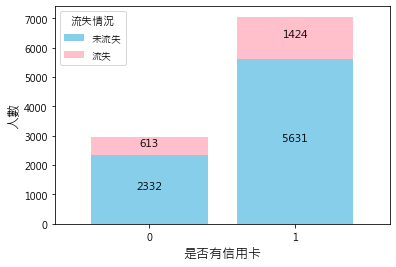

In [22]:
# fig = plt.figure(facecolor='lightgrey')
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams.update({'font.size': 11})

counts = df_copy.groupby(['HasCrCard', 'Exited']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['skyblue', 'pink']))
counts.plot(kind = 'bar', stacked = True, width = 0.8) 


for i, category in enumerate(counts.index):
    total_count = counts.loc[category].sum()
    bottom = 0
    for j, col_label in enumerate(counts.columns):
        count = counts.loc[category, col_label]
        plt.text(i, bottom + count/2, str(count), ha='center', color='black')
        bottom += count


plt.xlabel('是否有信用卡', fontsize = 13)
plt.ylabel('人數', fontsize = 13)
plt.legend(['未流失', '流失'], title='流失情況', fontsize=10)
plt.xticks(fontsize=10, rotation = 0)
plt.yticks(fontsize=10)

plt.show()

In [23]:
chi = np.array([counts.iloc[0, :].tolist(), 
                counts.iloc[1, :].tolist()])
scipy.stats.chi2_contingency(chi, correction = False)

Chi2ContingencyResult(statistic=0.5094769780392745, pvalue=0.475365355970654, dof=1, expected_freq=array([[2345.1035,  599.8965],
       [5617.8965, 1437.1035]]))

#### 活躍用戶-流失

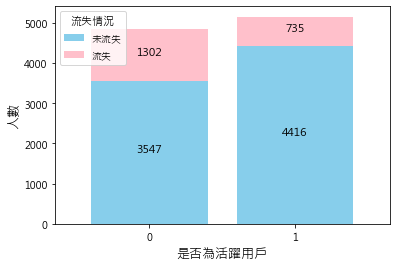

In [57]:
# fig = plt.figure(facecolor='lightgrey')
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 11})

counts = df_copy.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['skyblue', 'pink']))
counts.plot(kind = 'bar', stacked = True, width = 0.8) 


for i, category in enumerate(counts.index):
    total_count = counts.loc[category].sum()
    bottom = 0
    for j, col_label in enumerate(counts.columns):
        count = counts.loc[category, col_label]
        plt.text(i, bottom + count/2, str(count), ha='center', color='black')
        bottom += count


plt.xlabel('是否為活躍用戶', fontsize = 13)
plt.ylabel('人數', fontsize = 13)
plt.legend(['未流失', '流失'], title='流失情況', fontsize=10)
plt.xticks(fontsize=10, rotation = 0)
plt.yticks(fontsize=10)

plt.show()

In [58]:
chi = np.array([counts.iloc[0, :].tolist(), 
                counts.iloc[1, :].tolist()])
scipy.stats.chi2_contingency(chi, correction = False)

Chi2ContingencyResult(statistic=243.76039250232145, pvalue=5.953852540364001e-55, dof=1, expected_freq=array([[3861.2587,  987.7413],
       [4101.7413, 1049.2587]]))

In [60]:
p = scipy.stats.chi2_contingency(chi, correction = False)[1]
f'p_value: {p:.55f}'

'p_value: 0.0000000000000000000000000000000000000000000000000000006'

#### 性別-流失

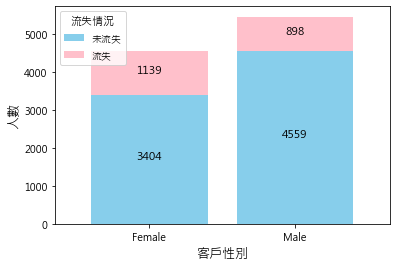

In [40]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 11})

counts = df_copy.groupby(['Gender', 'Exited']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['skyblue', 'pink']))
counts.plot(kind = 'bar', stacked = True, width = 0.8) 


for i, category in enumerate(counts.index):
    total_count = counts.loc[category].sum()
    bottom = 0
    for j, col_label in enumerate(counts.columns):
        count = counts.loc[category, col_label]
        plt.text(i, bottom + count/2, str(count), ha='center', color='black')
        bottom += count


plt.xlabel('客戶性別', fontsize = 13)
plt.ylabel('人數', fontsize = 13)
plt.legend(['未流失', '流失'], title='流失情況', fontsize=10)
plt.xticks(fontsize=10, rotation = 0)
plt.yticks(fontsize=10)

plt.show()

In [55]:
chi = np.array([counts.iloc[0, :].tolist(), 
                counts.iloc[1, :].tolist()])
scipy.stats.chi2_contingency(chi, correction = False)

Chi2ContingencyResult(statistic=113.44910030392086, pvalue=1.7204149874840846e-26, dof=1, expected_freq=array([[3617.5909,  925.4091],
       [4345.4091, 1111.5909]]))

In [56]:
p = scipy.stats.chi2_contingency(chi, correction = False)[1]
f'p_value: {p:.50f}'

'p_value: 0.00000000000000000000000001720414987484084557387985'

#### 年齡-流失

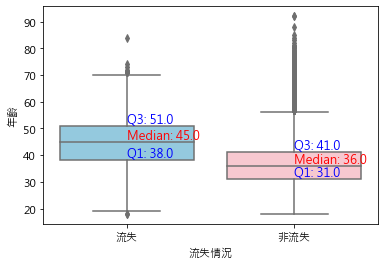

In [69]:
sns.boxplot(x = 'Exited', y = 'Age', data = df_copy)

q1_exited = df_copy[df_copy['Exited'] == '1']['Age'].quantile(0.25)
q3_exited = df_copy[df_copy['Exited'] == '1']['Age'].quantile(0.75)
median_exited = df_copy[df_copy['Exited'] == '1']['Age'].median()

q1_not_exited = df_copy[df_copy['Exited'] == '0']['Age'].quantile(0.25)
q3_not_exited = df_copy[df_copy['Exited'] == '0']['Age'].quantile(0.75)
median_not_exited = df_copy[df_copy['Exited'] == '0']['Age'].median()


plt.text(0, q1_exited, f'Q1: {q1_exited}', verticalalignment='bottom', fontsize=12, color='blue')
plt.text(0, q3_exited, f'Q3: {q3_exited}', verticalalignment='bottom', fontsize=12, color='blue')
plt.text(0, median_exited, f'Median: {median_exited}', verticalalignment='bottom', fontsize=12, color='red')

plt.text(1, q1_not_exited, f'Q1: {q1_not_exited}', verticalalignment='bottom', fontsize=12, color='blue')
plt.text(1, q3_not_exited, f'Q3: {q3_not_exited}', verticalalignment='bottom', fontsize=12, color='blue')
plt.text(1, median_not_exited, f'Median: {median_not_exited}', verticalalignment='bottom', fontsize=12, color='red')

plt.xlabel('流失情況')  
plt.ylabel('年齡')
plt.xticks(ticks = [0, 1], labels = ['流失', '非流失'])
# plt.title('年齡分布')

plt.show()

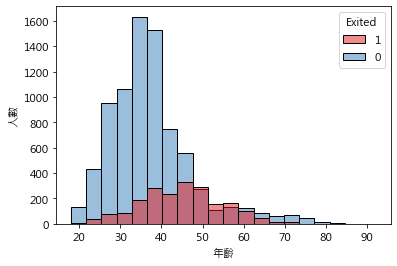

In [67]:
sns.histplot(data = df_copy, x='Age', bins=20, hue='Exited', palette='Set1')

plt.xlabel('年齡')
plt.ylabel('人數')
#plt.title('信用評分分佈')

plt.show()

#### 性別-活躍客戶

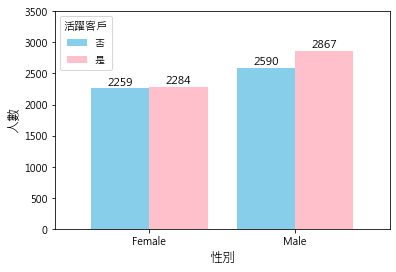

In [81]:
def add_bar_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')
counts = df_copy.groupby(['Gender', 'IsActiveMember']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['skyblue', 'pink']))
ax = counts.plot(kind = 'bar', stacked = False, width = 0.8)
add_bar_labels(ax)

plt.xlabel('性別', fontsize = 13)
plt.ylabel('人數', fontsize = 13)
plt.legend(['否', '是'], title='活躍客戶', fontsize=10)
plt.xticks(fontsize=10, rotation = 0)
plt.yticks(fontsize=10)
plt.ylim(0, 3500)

plt.show()

#### 活躍客戶-年齡

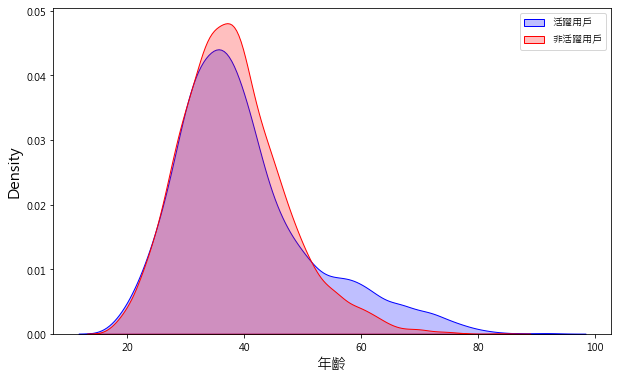

In [12]:
active_users = df_copy[df_copy['IsActiveMember'] == '1']
inactive_users = df_copy[df_copy['IsActiveMember'] == '0']

plt.figure(figsize = (10, 6))
sns.kdeplot(active_users['Age'], color = 'blue', label = '活躍用戶', fill=True)
sns.kdeplot(inactive_users['Age'], color = 'red', label = '非活躍用戶', fill=True)
plt.xlabel('年齡', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
# plt.title('Age Distribution of Active and Inactive Users')
plt.legend()
plt.show()

#### 產品數量-性別

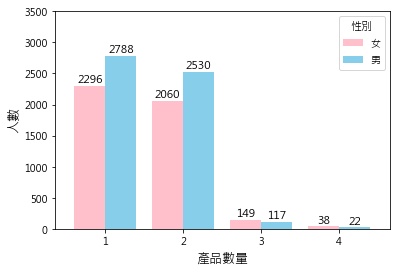

In [96]:
def add_bar_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')
counts = df_copy.groupby(['NumOfProducts', 'Gender']).size().unstack(fill_value = 0)

sns.set_palette(sns.color_palette(['pink', 'skyblue']))
ax = counts.plot(kind = 'bar', stacked = False, width = 0.8)
add_bar_labels(ax)

plt.xlabel('產品數量', fontsize = 13)
plt.ylabel('人數', fontsize = 13)
plt.legend(['女', '男'], title='性別', fontsize=10)
plt.xticks(fontsize=10, rotation = 0)
plt.yticks(fontsize=10)
plt.ylim(0, 3500)

plt.show()

### 訓練模型

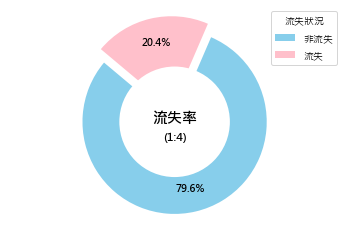

In [6]:
category_counts = df['Exited'].value_counts(normalize=True)

# 取得類別標籤和比例值
labels = category_counts.index.tolist()
sizes = category_counts.values.tolist()

plt.pie(sizes, autopct = '%1.1f%%', colors = ['skyblue', 'pink'], startangle = 140, explode = (0, 0.15), pctdistance = 0.74, textprops = {'fontweight': 'bold'})
centre_circle = plt.Circle((0,0), 0.6, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0, 0, '流失率', ha = 'center', fontsize = 15, fontweight = 'bold', color = 'black')
plt.text(0, -0.2, '(1:4)', ha = 'center', fontsize = 11, fontweight = 'bold', color = 'black')
plt.axis('equal')
plt.legend(['非流失', '流失'], title = '流失狀況')
plt.show()

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn import metrics

In [27]:
lb = LabelEncoder()
a = ['Geography']
#encoded_data = lb.fit_transform(df['Geography'])
for i in a :
    df[i] = lb.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',lb.inverse_transform(df[i].unique())) 

Geography  :  [0 2 1]  =  ['France' 'Spain' 'Germany']


In [28]:
# Female = 1; Male = 0
def gender_convert(x):
    if x == 'Female':
        return 1
    else:
        return 0
df['Gender'] = df['Gender'].apply(gender_convert)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [29]:
df = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]
df = df.drop(columns = 'HasCrCard')
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,1,112542.58,0
2,502,0,1,42,8,159660.80,3,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,0,92888.52,1


In [30]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [31]:
#ros = RandomOverSampler(sampling_strategy = 1)

#X, y = ros.fit_resample(X, y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [32]:
scaler = StandardScaler()

X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

Accuracy: 80.13 %


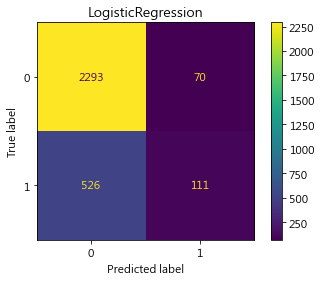

Accuracy: 79.00 %
Standard Deviation: 0.35 %
Precision: 39.00 %
Recall: 5.69 %
F1: 9.93 %


In [69]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred_lr)

print("Accuracy: {:.2f} %".format(accuracy_score(y_test.astype('int'), y_pred_lr.astype('int'))*100))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0, 1])
disp.plot()
plt.title("LogisticRegression")
plt.show()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
cv_accuracy_0 = cross_val_score(estimator = model_lr, X = X_train, y = y_train, cv = 10)
cv_precision_0 = cross_val_score(estimator = model_lr, X = X_train, y = y_train, cv = 10, scoring='precision')
cv_recall_0 = cross_val_score(estimator = model_lr, X = X_train, y = y_train, cv = 10, scoring='recall')
cv_f1_0 = cross_val_score(estimator = model_lr, X = X_train, y = y_train, cv = 10, scoring='f1')
#cv_roc_0 = cross_val_score(estimator = model_lr, X = X_train, y = y_train, cv = 10, scoring='roc_auc')
# print(cv_accuracy_0)
print('Accuracy: {:.2f} %'.format(cv_accuracy_0.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cv_accuracy_0.std()*100))
print('Precision: {:.2f} %'.format(cv_precision_0.mean()*100))
print('Recall: {:.2f} %'.format(cv_recall_0.mean()*100))
print('F1: {:.2f} %'.format(cv_f1_0.mean()*100))
#print('ROC_AUC: {:.2f} %'.format(cv_roc_0.mean()*100))

In [70]:
accuracy_0 = accuracy_score(y_test, y_pred_lr)
precision_0 = precision_score(y_test, y_pred_lr)
recall_0 = recall_score(y_test, y_pred_lr)
f1_0 = f1_score(y_test, y_pred_lr)
print(accuracy_0)
print(precision_0)
print(recall_0)
print(f1_0)

0.8013333333333333
0.6132596685082873
0.17425431711145997
0.27139364303178487


In [71]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np

model_lr = LogisticRegression()
grid = [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 'penalty':['none'],
                  "max_iter":[1000,5000,10000]}, 
                 {'solver':['lbfgs', 'newton-cg', 'sag'], 'penalty':['l2'], 
                  'C': np.logspace(-5, 5, 10), "max_iter":[1000,5000,10000]},
                 {'solver':['liblinear', 'saga'], 'penalty': ['l1', 'l2'], 
                  'C': np.logspace(-5, 5, 10), "max_iter":[1000,5000,10000]},
                 {'solver':['saga'], 'penalty':['elasticnet'], 'C': np.logspace(-5, 5, 10),
                  'l1_ratio': np.arange(0,1.1,0.1), "max_iter":[1000,5000,10000]}]  

model_grid = HalvingGridSearchCV(model_lr, grid, random_state=42, verbose=1,
                                         scoring='f1',return_train_score=True)
model_grid.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ", model_grid.best_params_)
print("f1 score :", model_grid.best_score_)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 28
max_resources_: 7000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 552
n_resources: 28
Fitting 5 folds for each of 552 candidates, totalling 2760 fits
----------
iter: 1
n_candidates: 184
n_resources: 84
Fitting 5 folds for each of 184 candidates, totalling 920 fits
----------
iter: 2
n_candidates: 62
n_resources: 252
Fitting 5 folds for each of 62 candidates, totalling 310 fits
----------
iter: 3
n_candidates: 21
n_resources: 756
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 4
n_candidates: 7
n_resources: 2268
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 5
n_candidates: 3
n_resources: 6804
Fitting 5 folds for each of 3 candidates, totalling 15 fits
tuned hpyerparameters :(best parameters)  {'C': 46.41588833612782, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
f1 score : 0.2374073024222166


Accuracy: 80.13 %


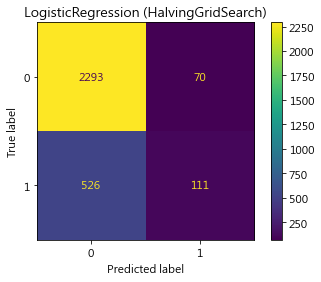

Accuracy: 80.84 %
Standard Deviation: 0.73 %
Precision: 60.07 %
Recall: 17.87 %
F1: 27.49 %


In [72]:
model_lr = LogisticRegression(C = 46.41588833612782, max_iter = 10000, penalty = 'l1', solver = 'liblinear')
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred_lr)

print("Accuracy: {:.2f} %".format(accuracy_score(y_test.astype('int'), y_pred_lr.astype('int'))*100))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [0, 1])
disp.plot()
plt.title("LogisticRegression (HalvingGridSearch)")
plt.show()

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
cv_accuracy_1 = cross_val_score(estimator = model_lr, X = X_train, y = y_train, cv = 10)
cv_precision_1 = cross_val_score(estimator = model_lr, X = X_train, y = y_train, cv = 10, scoring='precision')
cv_recall_1 = cross_val_score(estimator = model_lr, X = X_train, y = y_train, cv = 10, scoring='recall')
cv_f1_1 = cross_val_score(estimator = model_lr, X = X_train, y = y_train, cv = 10, scoring='f1')

print('Accuracy: {:.2f} %'.format(cv_accuracy_1.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cv_accuracy_1.std()*100))
print('Precision: {:.2f} %'.format(cv_precision_1.mean()*100))
print('Recall: {:.2f} %'.format(cv_recall_1.mean()*100))
print('F1: {:.2f} %'.format(cv_f1_1.mean()*100))
#print('ROC_AUC: {:.2f} %'.format(cv_roc_0.mean()*100))

In [73]:
accuracy_1 = accuracy_score(y_test, y_pred_lr)
precision_1 = precision_score(y_test, y_pred_lr)
recall_1 = recall_score(y_test, y_pred_lr)
f1_1 = f1_score(y_test, y_pred_lr)
print(accuracy_1)
print(precision_1)
print(recall_1)
print(f1_1)

0.8013333333333333
0.6132596685082873
0.17425431711145997
0.27139364303178487


Accuracy: 86.13 %


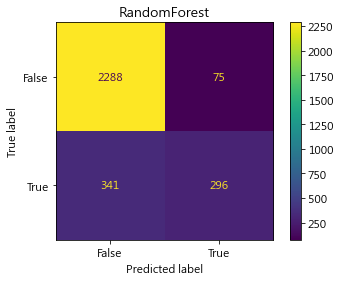

Accuracy: 86.14 %
Standard Deviation: 0.69 %
Precision: 75.53 %
Recall: 46.00 %
F1: 57.38 %


In [74]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf.astype('int'))


print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred_rf.astype('int'))*100))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
disp.plot()
plt.title("RandomForest")
plt.show()

cv_accuracy_2 = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10)
cv_precision_2 = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10, scoring='precision')
cv_recall_2 = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10, scoring='recall')
cv_f1_2 = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10, scoring='f1')
#cv_roc_1 = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10, scoring='roc_auc')
#print(cv_accuracy_1)
print('Accuracy: {:.2f} %'.format(cv_accuracy_2.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cv_accuracy_2.std()*100))
print('Precision: {:.2f} %'.format(cv_precision_2.mean()*100))
print('Recall: {:.2f} %'.format(cv_recall_2.mean()*100))
print('F1: {:.2f} %'.format(cv_f1_2.mean()*100))
#print('ROC_AUC: {:.2f} %'.format(cv_roc_1.mean()*100))

In [75]:
accuracy_2 = accuracy_score(y_test, y_pred_rf)
precision_2 = precision_score(y_test, y_pred_rf)
recall_2 = recall_score(y_test, y_pred_rf) 
f1_2 = f1_score(y_test, y_pred_rf)
print(accuracy_2)
print(precision_2)
print(recall_2)
print(f1_2)

0.8613333333333333
0.7978436657681941
0.46467817896389324
0.5873015873015872


In [76]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()


# class_weight:['balanced']
grid = {'n_estimators': [50, 100, 150], 'max_features': ['sqrt', 'log2', None], 
				'max_depth': [6, 7, 8, 9, 10, 11, 12], 'min_samples_split': [3, 6, 9],'min_samples_leaf': [3, 6, 9], 'class_weight': ['balanced']}

model_grid = HalvingGridSearchCV(model_rf, grid, random_state=42, verbose=1,
                                         scoring='f1',return_train_score=True)
model_grid.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ", model_grid.best_params_)
print("f1 score :", model_grid.best_score_)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 28
max_resources_: 7000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 567
n_resources: 28
Fitting 5 folds for each of 567 candidates, totalling 2835 fits
----------
iter: 1
n_candidates: 189
n_resources: 84
Fitting 5 folds for each of 189 candidates, totalling 945 fits
----------
iter: 2
n_candidates: 63
n_resources: 252
Fitting 5 folds for each of 63 candidates, totalling 315 fits
----------
iter: 3
n_candidates: 21
n_resources: 756
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 4
n_candidates: 7
n_resources: 2268
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 5
n_candidates: 3
n_resources: 6804
Fitting 5 folds for each of 3 candidates, totalling 15 fits
tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 9, 'min_samples_split': 3, 'n_esti

Accuracy: 82.60 %


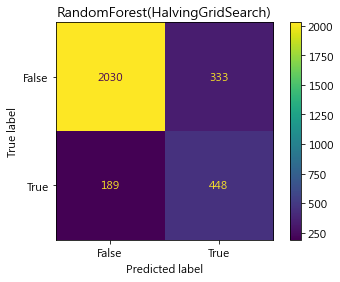

Accuracy: 82.15 %
Standard Deviation: 0.52 %
Precision: 54.85 %
Recall: 69.37 %
F1: 61.40 %


In [77]:
model_rf = RandomForestClassifier(class_weight = 'balanced', max_depth = 9, max_features = 'sqrt', min_samples_leaf = 9, min_samples_split = 3, n_estimators = 100)

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_rf.astype('int'))

print("Accuracy: {:.2f} %".format(accuracy_score(y_test, y_pred_rf.astype('int'))*100))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = [False, True])
disp.plot()
plt.title("RandomForest(HalvingGridSearch)")
plt.show()

cv_accuracy_3 = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10)
cv_precision_3 = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10, scoring='precision')
cv_recall_3 = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10, scoring='recall')
cv_f1_3 = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10, scoring='f1')
#cv_roc_2 = cross_val_score(estimator = model_rf, X = X_train, y = y_train, cv = 10, scoring='roc_auc')
#print(cv_accuracy_0)
print('Accuracy: {:.2f} %'.format(cv_accuracy_3.mean()*100))
print('Standard Deviation: {:.2f} %'.format(cv_accuracy_3.std()*100))
print('Precision: {:.2f} %'.format(cv_precision_3.mean()*100))
print('Recall: {:.2f} %'.format(cv_recall_3.mean()*100))
print('F1: {:.2f} %'.format(cv_f1_3.mean()*100))
#print('ROC_AUC: {:.2f} %'.format(cv_roc_2.mean()*100))

In [78]:
accuracy_3 = accuracy_score(y_test, y_pred_rf)
precision_3 = precision_score(y_test, y_pred_rf)
recall_3 = recall_score(y_test, y_pred_rf)
f1_3 = f1_score(y_test, y_pred_rf)
print(accuracy_3)
print(precision_3)
print(recall_3)
print(f1_3)

0.826
0.5736235595390525
0.7032967032967034
0.6318758815232722


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2375
           1       0.62      0.17      0.27       625

    accuracy                           0.81      3000
   macro avg       0.72      0.57      0.58      3000
weighted avg       0.78      0.81      0.76      3000



In [21]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2375
           1       0.58      0.64      0.61       625

    accuracy                           0.83      3000
   macro avg       0.74      0.76      0.75      3000
weighted avg       0.83      0.83      0.83      3000



In [79]:
pd.set_option('display.float_format', '{:.4f}'.format)

df_x = pd.DataFrame({
    'LogisticRegression': [cv_accuracy_0.mean(), cv_precision_0.mean(), cv_recall_0.mean(), cv_f1_0.mean()], 
    'LogisticRegression (HalvingGridSearch)': [cv_accuracy_1.mean(), cv_precision_1.mean(), cv_recall_1.mean(), cv_f1_1.mean()], 
    'RandomForest': [cv_accuracy_2.mean(), cv_precision_2.mean(), cv_recall_2.mean(), cv_f1_2.mean()], 
    'RandomForest (HalvingGridSearch)': [cv_accuracy_3.mean(), cv_precision_3.mean(), cv_recall_3.mean(), cv_f1_3.mean()]}, index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
df_x

,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.7900,0.3900,0.0569,0.0993
LogisticRegression (HalvingGridSearch),0.8084,0.6007,0.1787,0.2749
RandomForest,0.8614,0.7553,0.4600,0.5738
RandomForest (HalvingGridSearch),0.8215,0.5485,0.6937,0.6140


In [80]:
pd.set_option('display.float_format', '{:.4f}'.format)

df_y = pd.DataFrame({
    'LogisticRegression': [accuracy_0, precision_0, recall_0, f1_0], 
    'LogisticRegression (HalvingGridSearch)': [accuracy_1, precision_1, recall_1, f1_1], 
    'RandomForest': [accuracy_2, precision_2, recall_2, f1_2], 
    'RandomForest (HalvingGridSearch)': [accuracy_3, precision_3, recall_3, f1_3]}, index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
df_y

,Accuracy,Precision,Recall,F1 Score
LogisticRegression,0.8013,0.6133,0.1743,0.2714
LogisticRegression (HalvingGridSearch),0.8013,0.6133,0.1743,0.2714
RandomForest,0.8613,0.7978,0.4647,0.5873
RandomForest (HalvingGridSearch),0.8260,0.5736,0.7033,0.6319


In [27]:
model_rf.feature_importances_

array([0.0761861 , 0.05124154, 0.02214079, 0.34413263, 0.04092104,
       0.11271846, 0.21440341, 0.05884939, 0.07940662])

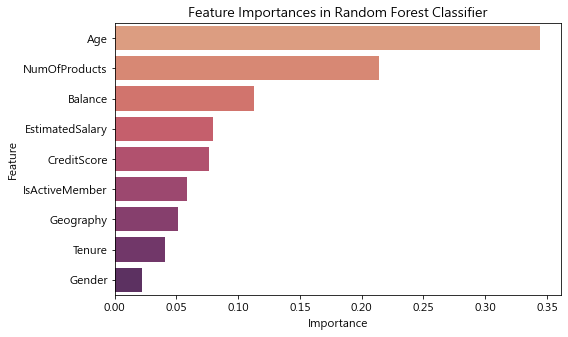

In [50]:
feature_importances = model_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 
                                'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='flare')
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest Classifier')
plt.show()

In [ ]:
#feature_importance_dict = dict(zip(X.columns, model_rf.feature_importances_))
#sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1])
#features, importances = zip(*sorted_feature_importance)

#plt.figure(figsize=(10, 6))
#colors = plt.cm.plasma(np.linspace(0, 1, len(features)))

#plt.barh(range(len(features)), importances, align='center', color = colors)
#plt.yticks(range(len(features)), features)
#plt.xlabel('Importance')
#plt.ylabel('Features')
# plt.title('Feature Importance of Random Forest Model')
#plt.show()